# Importing Dependancies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import pickle
import seaborn as sns


from sklearn.preprocessing import scale
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Stochastic Gradient Descent Classifier

In [3]:
with open ("NITRRData.pkl", "rb") as f:
    data=pickle.load(f)

In [4]:
x = data["features"]
y = data["target"]

In [5]:
x = scale(x)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3,random_state = 1)

In [6]:
sgdc = SGDClassifier(max_iter=100, tol=0.001)
print(sgdc)

SGDClassifier(max_iter=100)


In [7]:
sgdc.fit(xtrain, ytrain)

SGDClassifier(max_iter=100)

In [8]:
ypred = sgdc.predict(xtest)

In [9]:
print("Accuracy:", accuracy_score(ytest, ypred))

Accuracy: 0.8


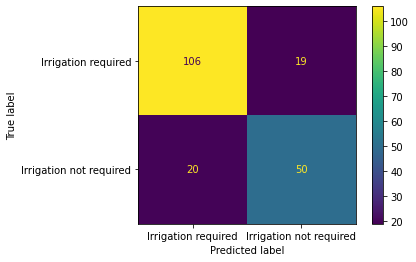

In [10]:
plot_confusion_matrix(sgdc, xtest, ytest,display_labels=['Irrigation required','Irrigation not required'])

# Support Vector Machine

In [11]:
with open('/content/NITRRData.pkl','rb') as d:
    data = pickle.load(d)

In [12]:
feature_matrix = data['features']
df=pd.DataFrame(feature_matrix)

In [13]:
label_vector = data['target']
df1 = pd.DataFrame(label_vector)
target_df = df1

In [14]:
data_df = pd.get_dummies(df,columns=['CropType'])

data_df.head()

,CropDays,SoilMoisture,Temperature,Humidity,CropType_1,CropType_2,CropType_3,CropType_4,CropType_5,CropType_6,CropType_7,CropType_8,CropType_9
63,16,230,28,71,1,0,0,0,0,0,0,0,0
93,74,600,23,15,1,0,0,0,0,0,0,0,0
92,70,990,24,19,1,0,0,0,0,0,0,0,0
91,66,700,25,17,1,0,0,0,0,0,0,0,0
90,65,660,23,15,1,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_df,target_df,random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [16]:
svm = SVC(random_state = 1)
svm.fit(X_train_scaled, y_train.values.ravel())

SVC(random_state=1)

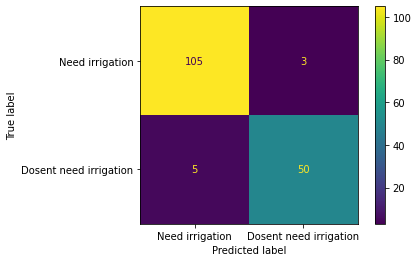

In [17]:
plot_confusion_matrix(svm,
                     X_test_scaled,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

In [18]:
param_grid = [
    { 'C': [0.5, 1, 5, 10, 15, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 10,
    scoring = 'accuracy'
)

optimal_params.fit(X_train_scaled, y_train.values.ravel())
print(optimal_params.best_params_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
optimised_svm = SVC(random_state = 42, C=100 , gamma='scale')
optimised_svm.fit(X_train_scaled, y_train.values.ravel())

SVC(C=100, random_state=42)

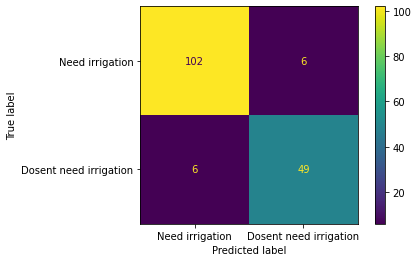

In [20]:
plot_confusion_matrix(optimised_svm,
                     X_test_scaled,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

In [21]:
y_pred = svm.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.6625766871165644


# K-Nearest Neighours

In [22]:
RANDOM_STATE = 1

In [23]:
data = pickle.load(open("/content/NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

In [25]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


In [26]:
knn_model = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier())
    ])

param_grid = {"knn__n_neighbors":[1, 2, 3, 4]}
gscv = GridSearchCV(knn_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'knn__n_neighbors': 3}

In [27]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors = 3))
    ])

model.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [28]:
model.classes_

array([0, 1])

In [29]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9307692307692308


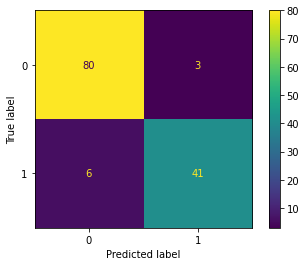

In [30]:
plot_confusion_matrix(model, X_test, y_test)

# Decision Tree Classifier

In [31]:
with open('/content/NITRRData.pkl','rb') as d:
    data = pickle.load(d)

In [32]:
feature_matrix = data['features']
df=pd.DataFrame(feature_matrix)

In [33]:
label_vector = data['target']
df1 = pd.DataFrame(label_vector)

target_df = df1

In [34]:
X=df
y=df1

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
params_dist={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    'max_depth':[x for x in range(1,13)]
}

clf = DecisionTreeClassifier(random_state=1)

grid=GridSearchCV(clf,param_grid=params_dist,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [37]:
grid.best_score_

0.923076923076923

In [38]:
NeedIrii_classifier= DecisionTreeClassifier(criterion = "entropy", max_depth=8,random_state=1)
NeedIrii_classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [39]:
NeedIrii_classifier.score(X_test,y_test)


0.9384615384615385

In [40]:
y_pred=NeedIrii_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [41]:
print("Accuracy Score of the model:", accuracy_score(y_test,y_pred))

Accuracy Score of the model: 0.9384615384615385


In [42]:
cf = confusion_matrix(y_test,y_pred)

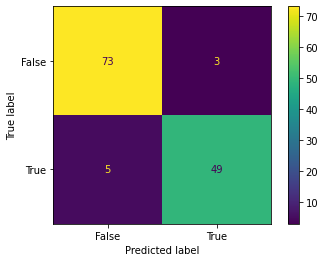

In [43]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

# Random Forest Classifier

In [44]:
data = pickle.load(open("/content/NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

In [46]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


In [47]:
rf_model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000))
    ])

param_grid = {"rf__criterion":["gini", "entropy", "log_loss"]}
gscv = GridSearchCV(rf_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'rf__criterion': 'gini'}

In [48]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000, criterion = "gini"))
    ])
model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=1000))])

In [49]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9461538461538461


# Adaboost Classifier

In [50]:
with open ("NITRRData.pkl", "rb") as f:
    data=pickle.load(f)

In [51]:
x = data["features"]
y = data["target"]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
x_train= x_train
x_test = x_test

In [53]:

svc = SVC(probability=True, random_state = 1)
dtc = DecisionTreeClassifier(max_depth=8,random_state=0)
rfc = RandomForestClassifier(max_depth = 1000, criterion = "gini")

abc_model = Pipeline([
    ("scale", StandardScaler()),
    ("abc", AdaBoostClassifier(n_estimators=100))
])

param_grid = {"abc__base_estimator": [dtc, rfc, svc], 
              "abc__learning_rate": [1, 0.1, 0.01, 0.5, 0.05]
}

gscv = GridSearchCV(abc_model, param_grid = param_grid)
gscv.fit(x_train, y_train)
gscv.best_params_

{'abc__base_estimator': RandomForestClassifier(max_depth=1000),
 'abc__learning_rate': 0.1}

In [54]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("abc", AdaBoostClassifier(n_estimators=100, base_estimator = rfc, learning_rate = 0.01))
])
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)


print("Accuracy of the model:", accuracy_score(y_test, y_pred))

Accuracy of the model: 0.9179487179487179


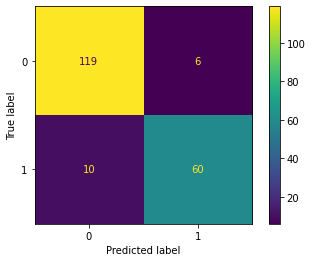

In [55]:
plot_confusion_matrix(model, x_test, y_test.values.ravel())